# Dinosaur Infographic Data

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np

plt.style.use('ggplot')

## Dinosaur List Dataset

The dinosaur list dataset contains a list of every dinosaur species documented, providing information for the species name, the period of time where they lived, the diet they were believed to consume and the location they were found.

### Loading the Dataset

The dataset is loaded and it's made sure that the index column is the name of the species, for easy identification.

In [2]:
# Loading the data
dinosaurs = pd.read_csv('dinosaur.csv', index_col=0)

# Displaying 5 random rows
dinosaurs.sample(5)

,Period,Diet,Country
Name,,,
Dilong,Cretaceous,carnivore,China
Oxalaia,Cretaceous,carnivore,South America
Staurikosaurus,Triassic,carnivore,South America
Zuniceratops,Cretaceous,herbivore,North America
Palaeoscincus,Cretaceous,herbivore,North America


### Testing the Dataset

There are 4 columns and 1154 rows in the dataset. 

In [3]:
# Show the shape of the dataset
dinosaurs.shape

# Show the first and last 5 rows
dinosaurs.head(5)
dinosaurs.tail(5)

# Show dinosaurs belonging to the Triassic period
dinosaurs[dinosaurs['Period'] == 'Triassic']

# Locating a specific species
dinosaurs.loc['Velociraptor']

Period           Cretaceous
Diet              carnivore
Country    Mongolia & China
Name: Velociraptor, dtype: object

### Cleaning the Data and Missing Values

There are a number of issues with the dataset, and all of them as a product of inconsistencies in the values.

#### Period Data

The period column describes the general period of time in which the animal is believed to have lived in. There exist three types of issues that need to be tackled on this column:

- Firstly, some of the values display apparent extra characters at the time of being input.
- Secondly, some of the species (But not all of them) display a more specific time period, such as Early, Middle or Late stages, or overlapping between different stages, e.g Jurassic / Cretaceous.
- Finally, there are some missing values for animals whose time period cannot be identified.

In order to deal with these inconsistencies, all the unique values will be identified, and then replaced accordingly.
For the purpose of the visualization that will be designed, only the general period will be necessary, so more specific time frames will just be replaced by the more general term. In the case of overlappings, the earliest of the periods will be assigned, in order to simplify the visualization. It has turned out there is only 1 missing value, so it can simply be removed.

In [4]:
# Getting all unique periods
dinosaurs.Period.unique()

# Replacing Unstable Periods with general names
dinosaurs['Period'] = dinosaurs['Period'].replace(['Late Triassic', 'Triassic or Jurassic', 'Triassic/Jurassic'], 'Triassic')
dinosaurs['Period'] = dinosaurs['Period'].replace(['Jurassic/Cretaceous', 'Middle Jurassic', 'Early Jurassic'], 'Jurassic')
dinosaurs['Period'] = dinosaurs['Period'].replace(['Cretaceous\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Early Cretaceous', 'Early-Late Cretaceous', 'Late Cretaceous'], 'Cretaceous')

# Getting rid of the "unknown" rows, since there is no way to guess the period and it doesn't help for the visualization
dinosaurs[dinosaurs['Period'] == '(unknown)']
dinosaurs.drop(dinosaurs.loc[dinosaurs['Period']=='(unknown)'].index, inplace=True)

# Display all the unique Period names
dinosaurs.Period.unique()

array(['Jurassic', 'Cretaceous', 'Triassic'], dtype=object)

#### Diet Data

The period column describes the diet that the animals were believed to have had. In this column, the problem of inconsistent values has been amplified, with differences in the use of parenthesis, upppercase/lowercase and even extra characters. Furthermore, some entries display more than one type of diet.

For inconsistently spelled entries, their values will simply be replaced for a unique term. Mixed diets have been assigned to the more general of the two, e.g omnivores consume both vegetable and animal matter, making the specification redundant. Furthermore, all of the insectivore animals have been assigned to carnivore, since an insectivore diet is simply a type of carnivore lifestyle. Finally, all the unknown values have also been replaced with a single term.

In [5]:
# Getting all unique diets
dinosaurs.Diet.unique()

# Unifying diet names
dinosaurs['Diet'] = dinosaurs['Diet'].replace(['herbivore', '(herbivore)', 'Herbivore'], 'Herbivore')
dinosaurs['Diet'] = dinosaurs['Diet'].replace(['carnivore', '(carnivore)', 'carnivore/insectivore', 'insectivore', 'carnivore?'], 'Carnivore')
dinosaurs['Diet'] = dinosaurs['Diet'].replace(['omnivore', 'herbivore/omnivore', 'omnivorous', 'carnivore/omnivore'], 'Omnivore')
dinosaurs['Diet'] = dinosaurs['Diet'].replace(['unknown', '(unknown)', '?'], 'Unknown')

# Display all the unique diets
dinosaurs.Diet.unique()

array(['Herbivore', 'Carnivore', 'Omnivore', 'Unknown'], dtype=object)

#### Region Data

The "Country" column the describes the location where animal was found. It is by far the most inconsistent column, with a high number of issues:

- Sometimes it does not even display a country, but the continent, e.g "South America".
- Some countries are spelled using either lowercase or uppercase, or some potential spelling mistakes.
- There are locations displaying more than one country, occasionally showing countries from different continents.
- The last and biggest issue with locations occurs with a number of entries where it provides descriptions about their names, or taxonomical information.

In order to deal with these inconsistencies a number of solutions have been provided.

- Firstly, the countries have been replaced with the overall region that they belong to. The following regions have been chosen: North America, South America, Europe, Africa, Asia, Oceania and Antarctica.
- A separate category for dinosaurs extending throughout different regions has been provided.
- Upon further investigation of the data, all the species with descriptions rather than locations seem to come from China or Mongolia, e.g Yizhousaurus, Yinlong or Xixiasaurus. Because of this, all these species have been asigned to Asia.
- Finally, the name of the column has been changed to "Region", to better adapt to its contents

In [6]:
# Getting all unique Locations
dinosaurs.Country.unique()

# Get the list of Countries belonging to a region
north_america = ['North America']
south_america = ['South America']
europe        = ['Romania', 'Spain, Portugal, England', 'Netherlands', 'Czech Republic', 'Germany & France', 'Belgium', 'England, France, Spain, Portugal', 'Denmark', 'Croatia', 'England, France', 'England and France', 'England, France, Austria, Romania, Belgium', 'Austria', 'Netherlands, Belgium', 'England & Portugal', 'Germany, France, Switzerland, Norway, & Greenland', 'Austria, France, Romania, Hungary','Belgium, England, Germany','Portugal, Spain', 'Poland','England', 'Spain','France','Portugal','Hungary','Spain, Portugal','Germany','Russia','France, Czech Republic, Romania, Spain', 'Austria, Romania, France, Hungary', 'Italy']
africa        = ['Morocco, Algeria, Egypt','Egypt, Niger, Algeria, Morocco', 'Algeria','Tanzania', 'Egypt,Niger, Morocco, Algeria','Egypt','South Africa, Zimbabwe, Lesotho', 'Lesotho','Malawi','Morocco, Niger & Tunisia','Tunisia', 'Zimbabwe','Egypt & Morocco','South Africa', 'Morocco', 'Egypt, Niger', 'South Africa, Lesotho, Zimbabwe','Niger','Angola','Madagascar']
asia          = ['Pakistan','China & South Korea','China & Mongolia','Uzbekistan','China, Russia, & Mongolia(?)','South Korea','Thailand','Laos','Kyrgyzstan', 'Mongolia & Uzbekistan','Korea','China, Mongolia & Thailand', 'China & Laos','China, Mongolia, Thailand (?), & Russia', 'Mongolia (& China\xa0?)','China', 'Mongolia','Japan','Mongolia (& China?)','India','Russia & China','Kazakhstan','Mongolia & China']
oceania       = ['Australia']
antarctica    = ['Antarctica']
descriptions  = ['Formerly referred to Phaedrolosaurus.', 'A sauropod with an unusually long neck.', 'A troodontid.', 'A basal sauropodomorph.', 'It was once thought to walk on four legs. This is now unlikely.', 'A basal ceratopsian.', 'Probably a sauropod.', 'A large basal sauropodomorph.', 'The only anchiornithid to live in the Cretaceous.', 'This name was a nomen nudum for eight years and was only formally described in 2018.', 'A very large sauropod.', 'A mamenchisaurid sauropod.', 'Probably a relative of Jeholosaurus.', 'A small oviraptorosaur.', 'A hadrosauroid.', 'Possibly a titanosaur.']
multiple      = ['Portugal & Uzbekistan','Portugal & USA', 'England, France, Switzerland, Morocco','USA, South Africa, & Zimbabwe','Mongolia, USA, Canada & China','Tanzania, USA, & Portugal','Portugal, USA, & Tanzania','Mongolia & Canada','England, Belgium, USA, France, Mongolia & Spain','South Africa & China (?)']


# North America, Central America, South America, Europe, Africa, Asia, Oceania, Antarctica
dinosaurs['Country'] = dinosaurs['Country'].replace(north_america, 'North America')
dinosaurs['Country'] = dinosaurs['Country'].replace(south_america, 'South America')
dinosaurs['Country'] = dinosaurs['Country'].replace(europe, 'Europe')
dinosaurs['Country'] = dinosaurs['Country'].replace(africa, 'Africa')
dinosaurs['Country'] = dinosaurs['Country'].replace(asia, 'Asia')
dinosaurs['Country'] = dinosaurs['Country'].replace(oceania, 'Oceania')
dinosaurs['Country'] = dinosaurs['Country'].replace(antarctica, 'Antarctica')
dinosaurs['Country'] = dinosaurs['Country'].replace(descriptions, 'Asia')
dinosaurs['Country'] = dinosaurs['Country'].replace(multiple, 'Multiple')

# Change column name to "Regions"
dinosaurs.rename(columns = {'Country':'Region'}, inplace = True) 

# Getting all unique Locations
dinosaurs.Region.unique()

array(['Africa', 'South America', 'Asia', 'North America', 'Europe',
       'Multiple', 'Antarctica', 'Oceania'], dtype=object)

#### Testing the Modified Dataset

The resulting dataset contains 3 columns and 1153 rows. Luckily, there was only 1 entry with missing values, so deleting its entry does not suppose a major loss of information.

In [7]:
# Show the shape of the dataset
dinosaurs.shape

# Show the first and last 5 rows
dinosaurs.head(5)
dinosaurs.tail(5)

# Show dinosaurs belonging to the Triassic period
dinosaurs[dinosaurs['Period'] == 'Triassic']

# Locating a specific species
dinosaurs.loc['Velociraptor']

# Outputting the new table
dinosaurs

,Period,Diet,Region
Name,,,
Aardonyx,Jurassic,Herbivore,Africa
Abelisaurus,Cretaceous,Carnivore,South America
Abrictosaurus,Jurassic,Herbivore,Africa
Abrosaurus,Jurassic,Herbivore,Asia
Abydosaurus,Cretaceous,Herbivore,North America
...,...,...,...
Zizhongosaurus,Jurassic,Herbivore,Asia
Zuniceratops,Cretaceous,Herbivore,North America
Zuolong,Jurassic,Carnivore,Asia


#### Displaying information

For some of the visualizations we may want to show particular dinosaurs

In [8]:
print(str(dinosaurs.loc['Velociraptor']) + "\n")

print(str(dinosaurs.loc['Mantellisaurus']) + "\n")

print(str(dinosaurs.loc['Tyrannosaurus']) + "\n")

Period    Cretaceous
Diet       Carnivore
Region          Asia
Name: Velociraptor, dtype: object

Period    Cretaceous
Diet       Herbivore
Region        Europe
Name: Mantellisaurus, dtype: object

Period       Cretaceous
Diet          Carnivore
Region    North America
Name: Tyrannosaurus, dtype: object



### Grouping by Different Columns

In order to show visualizations dependand on time scales, location and diet it will be necessary to create new datasets by grouping the entries.

#### Grouping by Period

One of the visualizations I will do is based on showing how many species have been found over the Mesozoic era. Therefore, the dataset has been grouped by periods, to then count the number of species for each one of them.

In [9]:
# Grouping Dinosaurs by period
dinosaurs_period = dinosaurs.groupby('Period')

# Aggregating the Count of Species
dinosaurs_period_agg = dinosaurs_period.agg({'count'})

# Change column name to "Number of Species"
dinosaurs_period_agg = dinosaurs_period_agg['Diet']
dinosaurs_period_agg.rename(columns = {'count':'Number of Species'}, inplace = True) 

# Displaying the periods
dinosaurs_period_agg

,Number of Species
Period,
Cretaceous,811
Jurassic,283
Triassic,59


##### Displaying the Information

A Bar Chart can now be generated to display number of dinosaur species throughout the Mesozoic era.

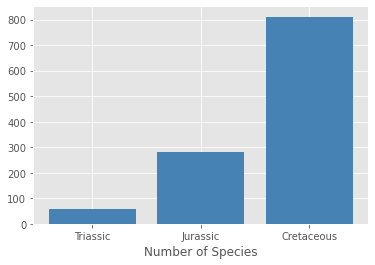

In [10]:
# Sorting by number of species
dinosaurs_period_agg = dinosaurs_period_agg.sort_values('Number of Species')

# Generating a bar chart
plt.bar(
    dinosaurs_period_agg.index,                # X Coordinate
    dinosaurs_period_agg['Number of Species'], # Y Coordinate
    color='steelblue'                          # Colour
)
plt.xlabel("Number of Species")                # Title

plt.show()

#### Grouping by Diet

Another visualization that will be shown is a pie chart showing the diets of dinosaurs that have been discovered so far, in order to show that a good number of them were actually herbivores. Just like with the periods, the dataset has then been grouped by diet, and the entries have been counted.

In [11]:
# Grouping Dinosaurs by Diet
dinosaurs_diet = dinosaurs.groupby('Diet')

# Aggregating the Count of Species
dinosaurs_diet_agg = dinosaurs_diet.agg({'count'})

# Change column name to "Number of Species"
dinosaurs_diet_agg = dinosaurs_diet_agg['Period']
dinosaurs_diet_agg.rename(columns = {'count':'Number of Species'}, inplace = True) 

# Displaying the periods
dinosaurs_diet_agg

,Number of Species
Diet,
Carnivore,352
Herbivore,720
Omnivore,70
Unknown,11


##### Displaying the Information

A Pie Chart can now be generated to display the percentages of species with a certain diet.

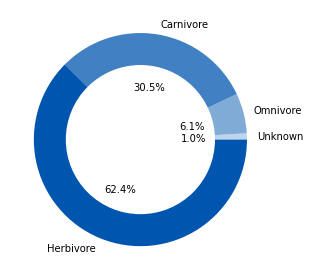

In [12]:
# Sorting by number of species
dinosaurs_diet_agg = dinosaurs_diet_agg.sort_values(by=['Number of Species'])

# Setting the labels and values, colours and gaps
labels = dinosaurs_diet_agg.index
sizes = dinosaurs_diet_agg['Number of Species']
colors = ['#BFD5EB','#80ABD7','#4080C3','#0056AF']
explode = (0.05, 0.05, 0.05, 0.05)
 
plt.pie(
    sizes,
    colors = colors,
    labels=labels,
    autopct='%1.1f%%',
    startangle=0,
    pctdistance=0.5,
    #explode = explode
)

# Draw the white circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()

plt.show()

#### Grouping by Region

The last visualization using the dinosaur list dataset will be a map with regions showing how many especies have been found in them. Again, the dataset can be grouped by region and then the species can be counted

In [13]:
# Grouping Dinosaurs by Region
dinosaurs_region = dinosaurs.groupby('Region')

# Aggregating the Count of Species
dinosaurs_region_agg = dinosaurs_region.agg({'count'})

# Change column name to "Number of Species"
dinosaurs_region_agg = dinosaurs_region_agg['Diet']
dinosaurs_region_agg.rename(columns = {'count':'Number of Species'}, inplace = True) 

# Displaying the periods
dinosaurs_region_agg

,Number of Species
Region,
Africa,84
Antarctica,6
Asia,412
Europe,192
Multiple,13
North America,274
Oceania,23
South America,149


#### Displaying the Information

A Bar Chart can now be generated to display the number of discovered species per region.

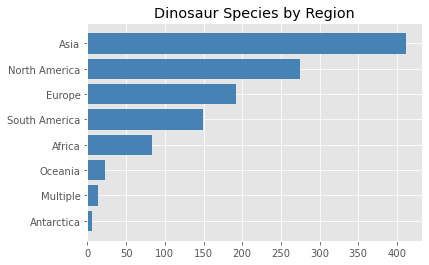

In [14]:
# Sorting by number of species
dinosaurs_region_agg = dinosaurs_region_agg.sort_values(by=['Number of Species'])

# Generate the bar chart
plt.barh(
    np.arange(len(dinosaurs_region_agg.index)),# Regions
    dinosaurs_region_agg['Number of Species'], # Number of Species
    align='center',                            # Center Alignment
    color='steelblue',                         # Colour
)

# Arrange the labels
plt.yticks(np.arange(len(dinosaurs_region_agg.index)), dinosaurs_region_agg.index)
plt.title('Dinosaur Species by Region')

plt.show()

## Mesozoic Periods Web Scraping

In order to define a timeline of the periods where dinosaurs lived, it is necessary to retrieve the limits of those periods, i.e when they started and finished. Since no dataset has been found for this purpose, a solution may be to scrap a website that contains the necessary information. The solution has been to use Wikipedia's article on the Mesozoic, since it defines the times where each one of the 3 periods occurred.

## Web Scraping

By using beautiful soup, the Wikipedia article was parsed, and the exact list where the necessary information appeared, was found. This happened to be the 4th list in the article. After that, the text of the list elements were turned into strings and then split into words, so the period names and the numbers could easily be added to previously created arrays. The exception was the period start, where the 1st character had to be skipped, since it was a comma.

In [15]:
# Create lists for periods
periods = []
start = []
end = []

# Define the url
url = "https://en.wikipedia.org/wiki/Mesozoic"

# request the url
r = requests.get(url)

# soup it
soup = BeautifulSoup( r.content, "html.parser")

# Getting the list of lists
ul_list = soup.findAll("ul")

# Get the list of eras specifically
period_list = ul_list[4].findAll("li")

for period in period_list:
    
    # Get the list of items in the text
    period_string_list = period.get_text().split()
    
    # Adding the period name
    periods.append(period_string_list[0])
    # Adding the period start, avoiding the comma
    start.append(period_string_list[1][1:])
    # Adding the period end
    end.append(period_string_list[3])
    
print(periods, start, end)

['Triassic', 'Jurassic', 'Cretaceous'] ['251.902', '201.3', '145'] ['201.3', '145', '66']


## Generating the Dataframe

Now that the arrays containing the different information were retrieved, a new dataframe can easily be built.

For its later use, the period name will be set as the dataset's index, and the Start and End columns will be changed to floating point numbers.

In [16]:
# Creating the dataframe from the scraped lists
period_ranges = pd.DataFrame({'Period Name':periods,'Start':start,'End':end})

# Set the Period Name as Index
period_ranges = period_ranges.set_index('Period Name')

# Change the types of Start and End to float numbers
period_ranges = period_ranges.astype({'Start':'float64','End':'float64'})

# Display the table
period_ranges

,Start,End
Period Name,,
Triassic,251.902,201.3
Jurassic,201.300,145.0
Cretaceous,145.000,66.0


### Testing the Dataset

There are 3 columns and 3 rows in the dataset. 

In [17]:
# Show the shape of the dataset
period_ranges.shape

# Show the data types
period_ranges['End'].dtypes

# Locate a specific time
period_ranges.loc['Jurassic']['Start']

201.3

## Paleo Biology Database

The Paleo Biology Database that contains 500 million years of evolution in North America. It provides information for every specimen found in North America, with each one of the individual occurrences of a fossil. 

It contains a number of files, showing the occurrences of extinct species, information on Geological strata and descriptions of every time interval of biological diversity. 

For the purposes of the infographic, the used files will be the ones including the found specimens and the description of diversity over times. Furthermore, the data will be limited to include only entries from the Mesozoic period (252ma - 66ma)

### Diversity Over Time

This file shows every interval of time of the Earth's existence where life has been documented, as well as the number of species found that lived during such interval. The main use of this file will for displaying an accurate timeline of the Mesozoic period, and for creating a line graph showing the change of diversity over time.

#### Loading the Dataset

The CSV file contains 20 lines of information before the table starts. Because of that, the "skiprows" flag has to be used, in order to jump straight to the table.

The loaded dataset has a size of 10 columns and 100 rows.

In [18]:
# Loading the data
diversity  = pd.read_csv('diversity_over_time.csv', skiprows=20)

# Show the size of the dataframe
diversity.shape

# Displaying 5 random rows
diversity.sample(5)

,interval_no,interval_name,max_ma,min_ma,X_Ft,X_bL,X_FL,X_bt,sampled_in_bin,n_occs
46,136,Norian,228.000,208.500,154,161,366,245,803,7297
4,741,Gelasian,2.588,1.806,38,13,49,1488,199,655
10,101,Langhian,15.970,13.820,158,120,76,1524,736,4647
51,653,Induan,252.170,251.200,36,14,37,222,112,1625
25,115,Coniacian,89.800,86.300,48,16,29,775,206,772


#### Cleaning Data and Adapting the Dataset

There was a number of preparations that had to be done to the dataset:

- For the purposes of the infographic the only necessary columns are the name of the interval (interval_name), the start and ending of the interval (max_ma and min_ma) and the Number of Occurences (n_occs).
- Once that only the necessary columns were kept, they were then renamed to more appropriate titles, being "Interval Name", "Start", "End" and "Species Found".
- The Interval Name was set as the index, since it's the main identification for the intervals.
- As the interest of this study lays on the Mesozoic era, it is then relevant to filter out all the periods outside this specific time frame. In order to do that, the previously scraped period data was used to keep only the intervals that occured between the beginning of the Triassic and the end of the Cretaceous.
- The intervals do not provide any information of the period they belong to, so a new column was created and then compared to the mesozoic periods dataset, and the overall period was added accordingly.
- Finally, the colums were ordered in a more sensible manner, to provide all the time-related information first, and then the number of species found from each interval.

In [19]:
# Keeping only necessary columns
diversity = diversity[['interval_name','max_ma','min_ma','n_occs']]

# Rename the Columns to more appropriate names
diversity_column_names = {'interval_name':'Interval Name','max_ma':'Start','min_ma':'End','n_occs':'Species Found'}
diversity = diversity.rename(columns = diversity_column_names)

# Set the Interval name as the index
diversity = diversity.set_index('Interval Name')

# Only keep entries from the Mesozoic (Dinosaur times)
time_condition = (diversity['Start'] <= period_ranges.loc['Triassic']['Start']) & (diversity['End'] >= period_ranges.loc['Cretaceous']['End'])
diversity = diversity[time_condition]

# Sort entries by date
diversity = diversity.sort_values('End', ascending=False)

# Adding a column to specify the overall period it belongs to
diversity.loc[diversity['Start']> period_ranges.loc['Cretaceous']['End'],'Period'] = "Cretaceous"
diversity.loc[diversity['Start']> period_ranges.loc['Jurassic']['End'],'Period'] = "Jurassic"
diversity.loc[diversity['Start']> period_ranges.loc['Triassic']['End'],'Period'] = "Triassic"

# Change the order of the columns
diversity = diversity[['Start','End','Period','Species Found']]

# Finally, output the dataset
diversity.sample(5)

,Start,End,Period,Species Found
Interval Name,,,,
Ladinian,242.0,237.0,Triassic,729
Barremian,129.4,125.0,Cretaceous,347
Toarcian,182.7,174.1,Jurassic,1918
Aalenian,174.1,170.3,Jurassic,220
Norian,228.0,208.5,Triassic,7297


In [25]:
diversity

,Start,End,Period,Species Found
Interval Name,,,,
Olenekian,251.2,247.2,Triassic,2785
Anisian,247.2,242.0,Triassic,1834
Ladinian,242.0,237.0,Triassic,729
Carnian,237.0,228.0,Triassic,1784
Norian,228.0,208.5,Triassic,7297
Rhaetian,208.5,201.3,Triassic,2445
Hettangian,201.3,199.3,Jurassic,334
Sinemurian,199.3,190.8,Jurassic,4278
Pliensbachian,190.8,182.7,Jurassic,5328


#### Displaying the Information

A Line Graph can now be generated to display the variation of diversity over the Mesozoic period.

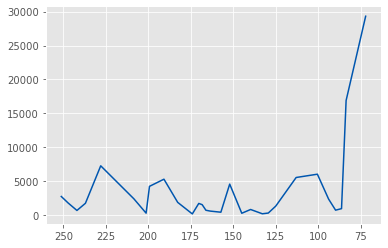

In [20]:
# Generate a Line Graph to depict Diversity over Time
plt.plot(diversity['Start'], diversity['Species Found'], '#0056AF')
plt.gca().invert_xaxis()

### Occurrences Dataset

The second file from the Paleo Biology Database is the Occurences dataset. In it, every specimen of every organism found in North America is registered, including information such as identification numbers, scientific names, the time interval it belongs to and the time frame they belonged to. This file will be mainly used to find information about specific species. 

#### Loading the Dataset

Just like with the time intervals dataset, it is firstly necessary to skip the reading of the file to the 16th row. Additionally, with such a large file (73MB) it is also necessary to set the low_memory flag to false, to avoid memory issues.

The loaded dataset has a size of 17 columns and 493,763 entries.

In [21]:
# Loading the data
occurences  = pd.read_csv('occurences.csv', skiprows=16, low_memory=False)

# Showing the unique ranks of the occurences
occurences.accepted_rank.unique()

# Show the size of the dataframe
occurences.shape

# Displaying 5 random rows
occurences.sample(5)

,occurrence_no,record_type,reid_no,flags,collection_no,identified_name,identified_rank,identified_no,difference,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,min_ma,reference_no
38542,60934,occ,NaN,NaN,4310,Liothyris sp.,genus,17821,NaN,Liothyris,genus,17821.0,Early Maastrichtian,NaN,70.600,66.000,281
78063,128316,occ,NaN,NaN,10555,Esmeraldina ? cometes,species,19127,species not entered,Esmeraldina,genus,19127.0,Montezuman,NaN,530.000,516.000,3901
335306,805553,occ,NaN,NaN,87926,Cheloniceras inconstans,species,14683,species not entered,Cheloniceras,genus,14683.0,Aptian,NaN,125.000,113.000,29564
156051,278425,occ,NaN,NaN,26617,Cranaena sp.,genus,30116,NaN,Cranaena,genus,30116.0,Eifelian,NaN,393.300,387.700,7308
424330,1065680,occ,NaN,NaN,131677,Trigoniocardia (Trigoniocardia) haitensis,species,102122,NaN,Trigoniocardia (Trigoniocardia) haitensis,species,102118.0,Messinian,NaN,7.246,5.333,24476


#### Cleaning Data and Missing Values

In order to prepare this dataset for later use, a number of modifications have to be made:

- Only the necessary columns must be kept, in this case "accepted_name", "early_interval", "max_ma", "min_ma" and "accepted_rank".
- One of the reasons the dataset is so large is because it does not only show species, but also genus, families and even kingdoms. Because of this, it is necessary to filter it only to species (e.g dogs, not canids). Once the species and subspecies have been filtered, the accepted rank column can be deleted.
- The columns can be renamed to more appropriate terms, such as the max_ma and min_ma to the earliest and latest time in which the species lived, or accepted_name to the Species name.
- For further ease of use, in the column of the Species name, only the first name was kept.
- The Species Name column can now be set as the index, to identify each occurence.
- Just like it was done with the Diversity over time dataset, only the species from the Mesozoic era were kept by using the limits provided by the web scraped dataset of Mesozoic periods.
- And again just like in the Diversity over time dataset, another column was added to show the overall period the specimen lived in.

The resulting dataset now has a slightly more manageable size of 4 columns and 32,567 entries.

In [22]:
# Keeping only necessary columns
occurences = occurences[[ 'accepted_name','early_interval','max_ma','min_ma','accepted_rank']]

# Only keep species, then delete the rank column
species_condition = (occurences['accepted_rank'] == 'species') | (occurences['accepted_rank'] == 'subspecies')
occurences = occurences[species_condition]
occurences = occurences.drop(columns=['accepted_rank'])

# Rename the Columns to more appropriate names
column_names = {'accepted_name':'Species Name','early_interval':'Interval','max_ma':'Earliest','min_ma':'Latest'}
occurences = occurences.rename(columns = column_names)

# Get rid of empty species names and keep first name
occurences = occurences.dropna()
occurences['Species Name'] = occurences['Species Name'].str.split(' ').str[0]

# Set the species name as the index
occurences = occurences.set_index('Species Name')

# Only keep entries from the Mesozoic (Dinosaur times)
time_condition = (occurences['Earliest'] < period_ranges.loc['Triassic']['Start']) & (occurences['Latest'] > period_ranges.loc['Cretaceous']['End'])
occurences = occurences[time_condition]

# Sort entries by date
occurences = occurences.sort_values('Latest', ascending=False)

# Adding a column to specify the overall period it belongs to
occurences.loc[occurences['Earliest']> period_ranges.loc['Cretaceous']['End'],'Period'] = "Cretaceous"
occurences.loc[occurences['Earliest']> period_ranges.loc['Jurassic']['End'],'Period'] = "Jurassic"
occurences.loc[occurences['Earliest']> period_ranges.loc['Triassic']['End'],'Period'] = "Triassic"

# Show the size of the dataframe
occurences.shape

# Finally, test the dataset by finding occurences of a species
occurences.loc['Stegosaurus']

,Interval,Earliest,Latest,Period
Species Name,,,,
Stegosaurus,Kimmeridgian,157.3,152.1,Jurassic
Stegosaurus,Kimmeridgian,157.3,152.1,Jurassic
Stegosaurus,Kimmeridgian,157.3,152.1,Jurassic
Stegosaurus,Kimmeridgian,157.3,152.1,Jurassic
Stegosaurus,Early Tithonian,150.8,145.0,Jurassic
Stegosaurus,Kimmeridgian,157.3,145.0,Jurassic
Stegosaurus,Kimmeridgian,157.3,145.0,Jurassic
Stegosaurus,Kimmeridgian,157.3,145.0,Jurassic
Stegosaurus,Kimmeridgian,157.3,145.0,Jurassic


#### Grouping the specimens

The generated dataset is perfectly usable, but a secondary dataset can be produced to count the number of specimens from a single species. There exist differences in the time periods for certain occurences, such as the Stegosaurus in the previous output, in which one of the speciments is believed to have lived in the Early Tithonian interval, instead of the Kimmeridgian like the rest of specimens. However, these variations are quite negligible when trying to show the overall time period. In order to create such dataset, some preparation must be made:

- Firstly, the table can be grouped by the species name, and a new column can be created, showing the count of specimens.
- Secondly, the columns from the parent dataset can be added to the new one, by adding the information of the first entry of each specimen (As discussed earlier there are variations but too small to be meaningful).
- Finally, the columns can be arranged to show the number of occurrences at the end.

The resulting table is now 5 columns and 3,358 rows, a fraction of the dataset's original size.

In [23]:
# Grouping Dinosaurs by period
occurences_grouped = occurences.groupby('Species Name')

# Aggregating the Count of Species
occurences_grouped_agg = occurences_grouped.agg({'count'})

# Change column name to "Occurences"
occurences_grouped_agg = occurences_grouped_agg['Interval']
occurences_grouped_agg.rename(columns = {'count':'Occurences'}, inplace = True) 

# Add the earliest occurence time period
occurences_grouped_agg['Earliest'] = occurences[~occurences.index.duplicated(keep='first')]['Earliest']
occurences_grouped_agg['Latest'] = occurences[~occurences.index.duplicated(keep='first')]['Latest']
occurences_grouped_agg['Interval'] = occurences[~occurences.index.duplicated(keep='first')]['Interval']
occurences_grouped_agg['Period'] = occurences[~occurences.index.duplicated(keep='first')]['Period']

# Change the order of the columns
occurences_grouped_agg = occurences_grouped_agg[['Earliest','Latest','Interval','Period','Occurences']]

# Show the size of the dataframe
occurences_grouped_agg.shape

# Show the dataset
occurences_grouped_agg

,Earliest,Latest,Interval,Period,Occurences
Species Name,,,,,
Abietites,112.03,109.0,Early Albian,Cretaceous,7
Abrekopsis,251.30,247.2,Smithian,Triassic,16
Abydosaurus,109.00,93.5,Middle Albian,Cretaceous,1
Abyssochrysos,145.00,100.5,Early Cretaceous,Cretaceous,1
Acadiella,237.00,228.0,Carnian,Triassic,1
...,...,...,...,...,...
Zugmayerella,237.00,228.0,Carnian,Triassic,20
Zuniceratops,93.50,89.3,Middle Turonian,Cretaceous,3
Zygastrocarcinus,113.00,100.5,Albian,Cretaceous,1


#### Displaying the Information

Now the information of specific species can be retrieved, providing a general summary about the time period it lived in and the number of species that have been found.

In [26]:
print(str(occurences_grouped_agg.loc['Coelophysis']) + "\n")

print(str(occurences_grouped_agg.loc['Stegosaurus']) + "\n")

print(str(occurences_grouped_agg.loc['Tyrannosaurus']) + "\n")

print(str(occurences_grouped_agg.loc['Utahraptor']) + "\n")

Earliest           228
Latest           208.5
Interval        Norian
Period        Triassic
Occurences           9
Name: Coelophysis, dtype: object

Earliest             157.3
Latest               152.1
Interval      Kimmeridgian
Period            Jurassic
Occurences              12
Name: Stegosaurus, dtype: object

Earliest                83.5
Latest                  70.6
Interval      Late Campanian
Period            Cretaceous
Occurences                 2
Name: Tyrannosaurus, dtype: object

Earliest           129.4
Latest               125
Interval       Barremian
Period        Cretaceous
Occurences             2
Name: Utahraptor, dtype: object

